In [1]:
#https://www.aprendemachinelearning.com/sistemas-de-recomendacion/
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

In [3]:
df_users = pd.read_csv("datasets/users.csv")
df_repos = pd.read_csv("datasets/repos.csv")
df_ratings = pd.read_csv("datasets/ratings.csv")
print(df_users.head())
print(df_repos.head())
print(df_ratings.head())

   userId     username                  name
0       1     iris9112  Isabel Ruiz Buriticá
1       2  dianaclarke                 Diana
2       3  nateprewitt          Nate Prewitt
3       4       oldani       Ordanis Sanchez
4       5   waflessnet            waflessnet
   repoId                              title  \
0       1                airbnb / javascript   
1       2  kamranahmedse / developer-roadmap   
2       3                 microsoft / vscode   
3       4                   torvalds / linux   
4       5              ytdl-org / youtube-dl   

                                          categories    stars  
0                                          completar      NaN  
1        Roadmap to becoming a web developer in 2019  85800.0  
2                                 Visual Studio Code  80855.0  
3                           Linux kernel source tree  78761.0  
4  Command-line program to download videos from Y...  53909.0  
   userId  repoId  rating
0       1       1       2
1    

In [4]:
n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.repoId.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

30 users
167 items


(array([94., 62., 66., 28., 40., 12., 14.,  8.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <BarContainer object of 8 artists>)

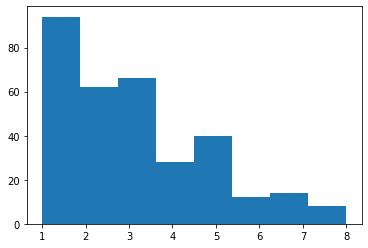

In [5]:
plt.hist(df_ratings.rating,bins=8)

In [6]:
df_ratings.groupby(["rating"])["userId"].count()

rating
1    94
2    62
3    66
4    28
5    40
6    12
7    14
8     8
Name: userId, dtype: int64

(array([94., 31., 22.,  7.,  8.,  2.,  2.,  1.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <BarContainer object of 8 artists>)

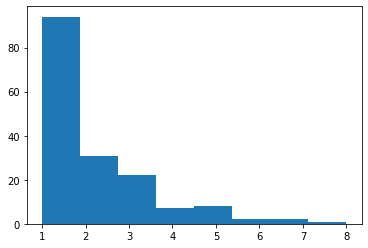

In [7]:
plt.hist(df_ratings.groupby(["repoId"])["repoId"].count(),bins=8)

In [8]:
df_matrix = pd.pivot_table(df_ratings, values='rating', index='userId', columns='repoId').fillna(0)
df_matrix

repoId,1,2,3,4,5,6,7,8,9,10,...,158,159,160,161,162,163,164,165,166,167
userId,,,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,4.0,5.0,3.0,1.0,5.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 6.43%


In [10]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.2, random_state=42)
print(ratings_train.shape)
print(ratings_test.shape)

(24, 167)
(6, 167)


(30, 30)


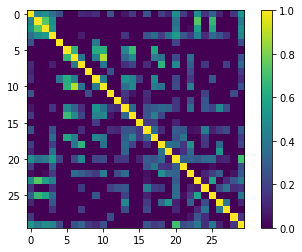

In [12]:
# Matriz la similitud entre usuarios.

sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)
print(sim_matrix.shape)

plt.imshow(sim_matrix);
plt.colorbar()
plt.show()

In [18]:
#separar las filas y columnas de train y test
sim_matrix_train = sim_matrix[0:24,0:24]
sim_matrix_test = sim_matrix[24:30,24:30]
 
users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

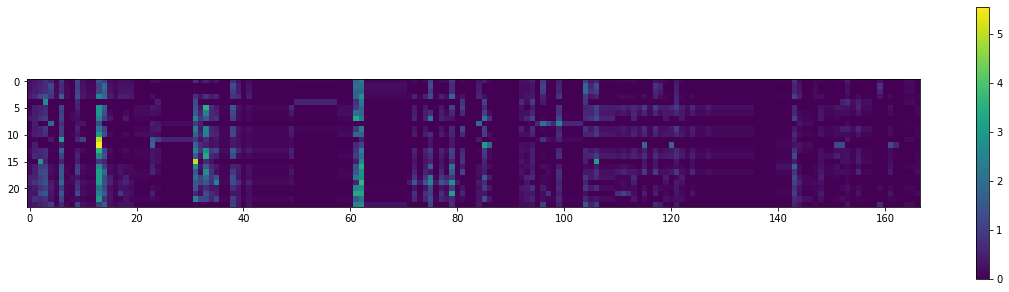

In [19]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()

In [21]:
# Predicción de Repos sugeridos para ti.

USUARIO_EJEMPLO = 'raulcd'
data = df_users[df_users['username'] == USUARIO_EJEMPLO]
usuario_ver = data.iloc[0]['userId'] - 1 # resta 1 para obtener el index de pandas.
 
user0=users_predictions.argsort()[usuario_ver]
 
# Veamos los tres recomendados con mayor puntaje en la predic para este usuario
for i, aRepo in enumerate(user0[-3:]):
    selRepo = df_repos[df_repos['repoId']==(aRepo+1)]
    print(selRepo['title'] , 'puntaje:', users_predictions[usuario_ver][aRepo])

14    Avik-Jain / 100-Days-Of-ML-Code
Name: title, dtype: object puntaje: 1.6410623952879708
61    jbagnato / machine-learning
Name: title, dtype: object puntaje: 2.515630278696174
62    tensorflow / tensorflow
Name: title, dtype: object puntaje: 2.6156720784917566


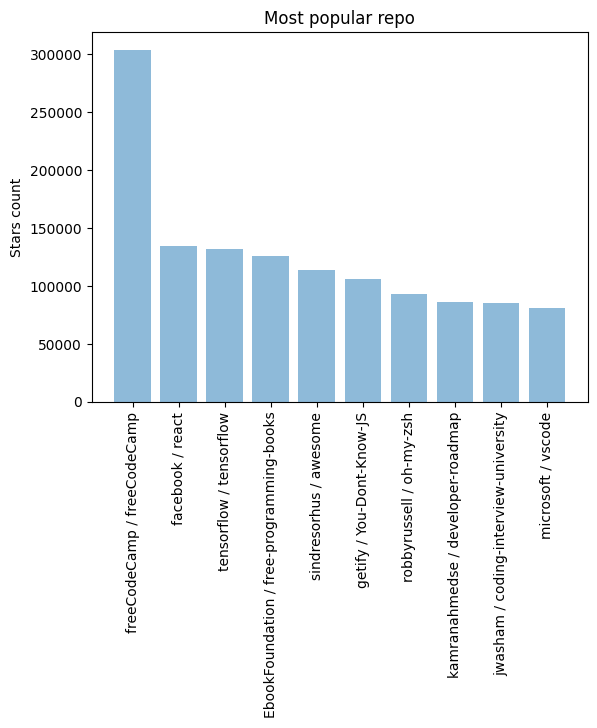

In [22]:
#Repo mas popular -sin collaborative filtering-, es decir sin aplicar ML, para todos los usuarios igual.

popular_repo = df_repos[['title','stars']].groupby('stars').sum().reset_index()
popular_repo_top_20 = popular_repo.sort_values('stars', ascending=False).head(n=10)

plt.rcdefaults()
 
objects = (list(popular_repo_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_repo_top_20['stars'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Stars count')
plt.title('Most popular repo')
 
plt.show()